In [1]:
import pandas as pd
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from tensorflow import keras 
import tensorflow as tf

# Dataset Loading

In [2]:
train_data_path=r"F:\BD MSc\Jahangirnagar MSc\MSc Research\Leaf Disease\Corn Leaves Diseases Detection\Implementation\data\Train"
test_data_path=r"F:\BD MSc\Jahangirnagar MSc\MSc Research\Leaf Disease\Corn Leaves Diseases Detection\Implementation\Augmented Data"

# Train & Test Data Separation

In [3]:
CATEGORIES=["Blight","Common_Rust","Gray_Leaf_Spot","Healthy"]

In [6]:
train_data=[] #List of the data for training

for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(train_data_path,category)
        for img_file in os.listdir(path):
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(64,64))            
            train_data.append([img,label])

In [7]:
test_data=[] #List of the data for test
for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(test_data_path,category)
        for img_file in os.listdir(path):
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(64,64))
            test_data.append([img,label])

In [8]:
print(len(train_data))
print(len(test_data))

4188
4629


In [9]:
import random
random.shuffle(train_data)
random.shuffle(test_data)

# Test Train Split

In [13]:
X_train=[]
y_train=[]

In [14]:
for features,label in train_data:
    X_train.append(features)
    y_train.append(label)

In [15]:
Y=[]
for i in y_train:
    if i==0:
        Y.append("Blight")
    elif i==1:
        Y.append("Common_Rust")
    elif i==2:
        Y.append("Gray_Leaf_Spot")
    else:
        Y.append("Healthy")
    

len(X_train),len(y_train)

(4188, 4188)

In [16]:
X_test=[]
y_test=[]

for features,label in test_data:
    X_test.append(features)
    y_test.append(label)
    
Z=[]
for i in y_test:
    if i==0:
        Z.append("Blight")
    elif i==1:
        Z.append("Common_Rust")
    elif i==2:
        Z.append("Gray_Leaf_Spot")
    else:
        Z.append("Healthy")

len(X_test),len(y_test)

(4629, 4629)

# Reshaping Test&Train Data

In [18]:
X_train=np.array(X_train).reshape(-1,64,64,3)
X_train=X_train/255.0
X_train.shape

(4188, 64, 64, 3)

In [19]:
X_test=np.array(X_test).reshape(-1,64,64,3)
X_test=X_test/255.0
X_test.shape

(4629, 64, 64, 3)

# Data Visualization

In [20]:
order=["Blight","Common_Rust","Gray_Leaf_Spot","Healthy"]

Text(0, 0.5, 'Image Count')

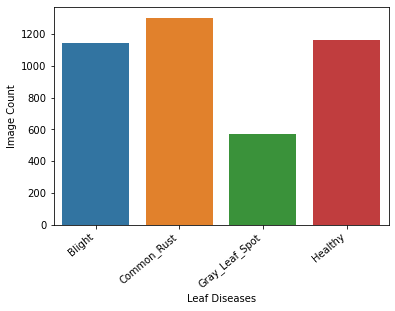

In [21]:
ax=sns.countplot(Y, order=order)
ax.set_xlabel("Leaf Diseases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.set_ylabel("Image Count")

Text(0, 0.5, 'Image Count')

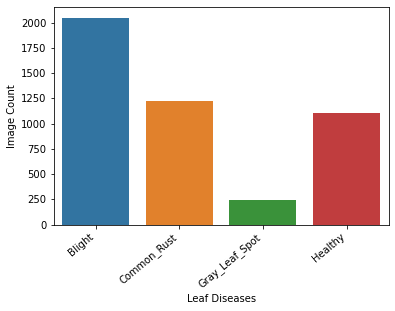

In [22]:
ax=sns.countplot(Z, order=order)
ax.set_xlabel("Leaf Diseases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.set_ylabel("Image Count")

# Converting dataset labels vector to categorical data matrix

In [23]:
from tensorflow.keras.utils import to_categorical

one_hot_train=to_categorical(y_train)
one_hot_train

one_hot_test=to_categorical(y_test)
one_hot_test

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

# Building Convolutional Neural Network

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout